In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
def f(x):
    return 1 + np.sin(6 * (x - 2))

def noisy_f(x):
    noise = np.random.normal(0, 0.3)
    return noise + f(x)

In [4]:
# Generate data
D = [noisy_f(x) for x in np.linspace(0, 1, 10)]
T = [noisy_f(x) for x in np.linspace(0, 1, 100)]
print(D)

[0.92940267807465404, 1.744631821392872, 1.6941553389874127, 1.9133256336395352, 0.81441014777761234, 0.32184863519649531, 0.0040093946266666009, -0.13896025909892051, 0.62161986505160483, 1.0026283146331814]


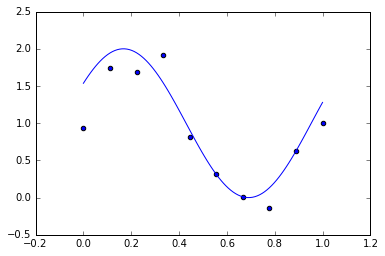

In [5]:
plt.scatter(np.linspace(0, 1, 10), D)
X = np.linspace(0, 1, 100)
y = [f(x) for x in X]
plt.plot(X, y)
plt.savefig('sin_d.png')
plt.show()

In [6]:
def pol_cur_fit(D, M):
    x = D[0, :]
    t = D[1, :]
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i, j] = np.sum(x ** (i+j))
    T = np.zeros(M)
    for i in range(M):
        T[i] = np.sum(t * x**i)
    w = np.linalg.solve(A, T)
    return w

In [7]:
N = 10
N_test = 10
D = [noisy_f(x) for x in np.linspace(0, 1, N)]
T = [noisy_f(x) for x in np.linspace(0, 1, N_test)]
training_data = np.vstack((np.linspace(0, 1, N), D))
test_data = np.vstack((np.linspace(0, 1, N_test), T))

def polynomial(X, w):
    return np.polyval(list(reversed(w)), X)

def RMSE(observed, target):
    error = 0.5 * np.sum((observed - target)**2)
    return np.sqrt(2*error / len(observed))

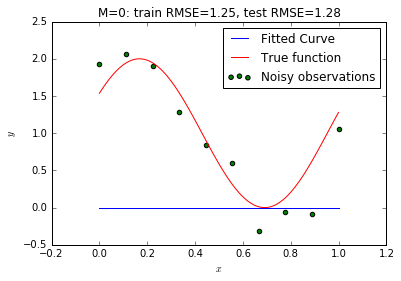

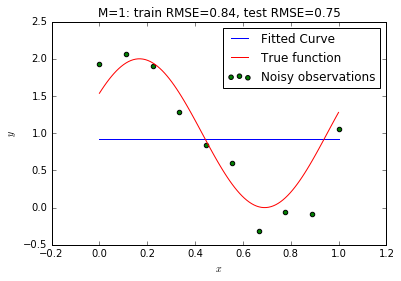

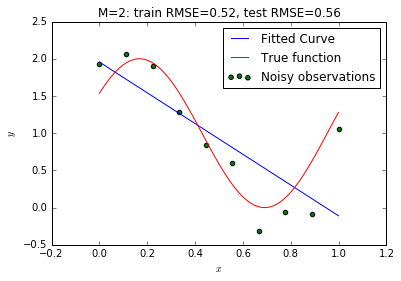

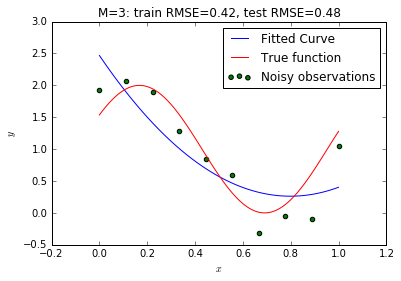

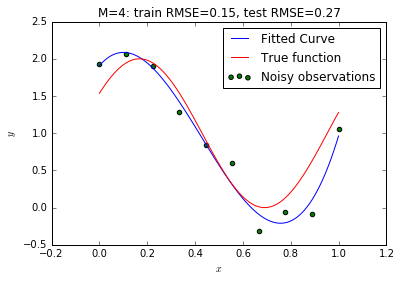

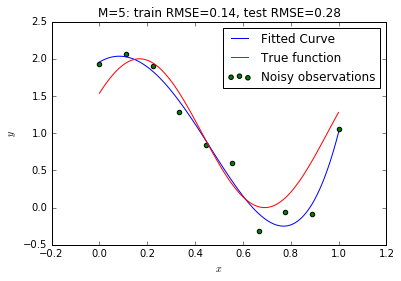

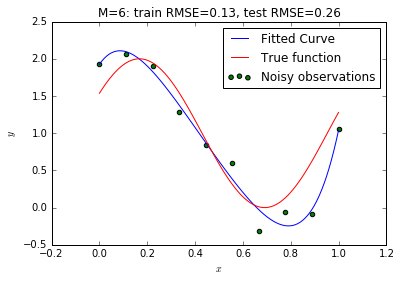

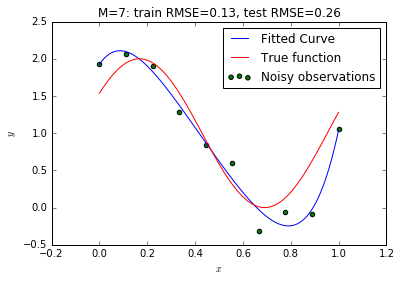

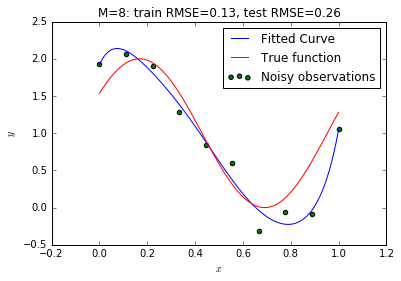

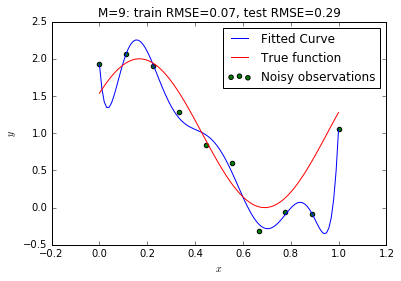

In [8]:
X = np.linspace(0, 1, 100)
for m in range(10):
    w = pol_cur_fit(training_data, m)
    fitted_curve = polynomial(X, w)
    
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    
    plt.plot(X, fitted_curve, 'b', label='Fitted Curve')
    plt.plot(X, y, 'r', label='True function')
    plt.scatter(training_data[0, :], training_data[1, :], c='g', label='Noisy observations')
    plt.title('M=%d: train RMSE=%.2f, test RMSE=%.2f' % (m, rms_train, rms_test))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.savefig('images/fit_m%d_n_%d.png' % (m, training_data.shape[1]))
    plt.show()




In [9]:
def pol_cur_fit_reg(D, M, l=0.01):
    x = D[0, :]
    t = D[1, :]
    A = np.zeros((M, M))
    for i in range(M):
        for j in range(M):
            A[i, j] = np.sum(x ** (i+j))
    A += l * np.identity(M)
    T = np.zeros(M)
    for i in range(M):
        T[i] = np.sum(t * x**i)
    w = np.linalg.solve(A, T)
    return w

regularized w: []
nonreg w: []


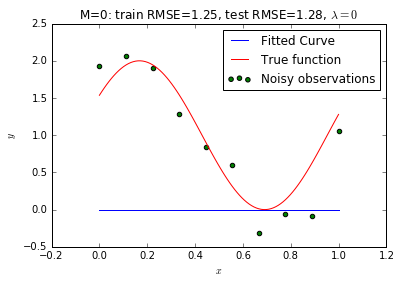

regularized w: [ 0.9231138]
nonreg w: [ 0.9231138]


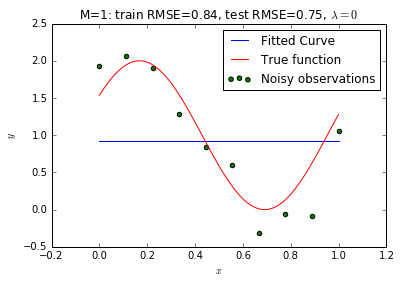

regularized w: [ 1.95625476 -2.06628192]
nonreg w: [ 1.95625476 -2.06628192]


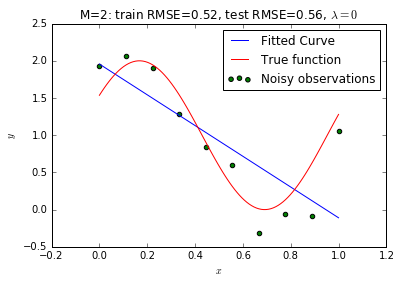

regularized w: [ 2.46882682 -5.52614329  3.45986137]
nonreg w: [ 2.46882682 -5.52614329  3.45986137]


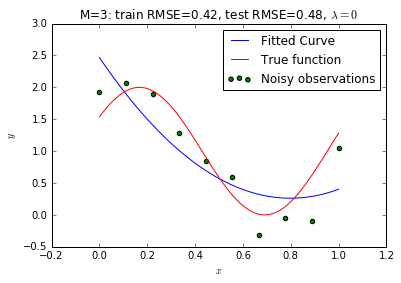

regularized w: [  1.90838802   3.70108113 -20.85917915  16.21269368]
nonreg w: [  1.90838802   3.70108113 -20.85917915  16.21269368]


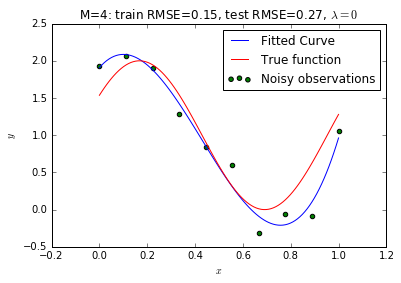

regularized w: [  1.95588187   1.92006197 -11.86503238   1.78643847   7.2131276 ]
nonreg w: [  1.95588187   1.92006197 -11.86503238   1.78643847   7.2131276 ]


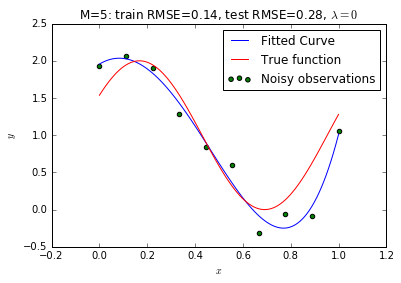

regularized w: [  1.92607585   4.63539063 -34.49898078  65.76506596 -66.12086523
  29.33359713]
nonreg w: [  1.92607585   4.63539063 -34.49898078  65.76506596 -66.12086523
  29.33359713]


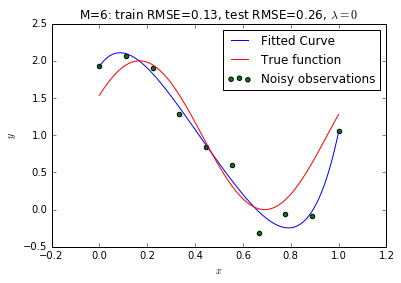

regularized w: [  1.92594516   4.67026381 -34.92922055  67.61685826 -69.6994092
  32.51677451  -1.06105913]
nonreg w: [  1.92594516   4.67026381 -34.92922055  67.61685826 -69.6994092
  32.51677451  -1.06105913]


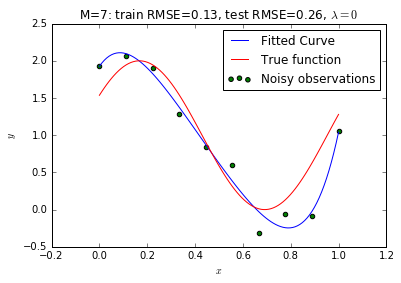

regularized w: [   1.92389038    6.89235172  -71.59541028  285.05155226 -684.50927511
  929.08875038 -651.7090888   185.89943713]
nonreg w: [   1.92389038    6.89235172  -71.59541028  285.05155226 -684.50927511
  929.08875038 -651.7090888   185.89943713]


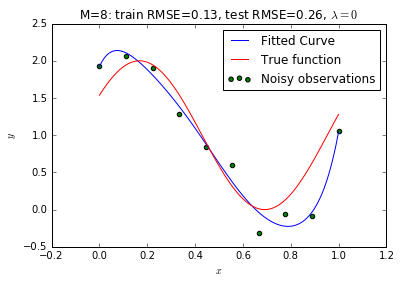

regularized w: [  1.93049589e+00  -4.03812300e+01   8.81744112e+02  -6.90558786e+03
   2.64417814e+04  -5.55452427e+04   6.52350123e+04  -4.01529103e+04
   1.00847026e+04]
nonreg w: [  1.93049589e+00  -4.03812300e+01   8.81744112e+02  -6.90558786e+03
   2.64417814e+04  -5.55452427e+04   6.52350123e+04  -4.01529103e+04
   1.00847026e+04]


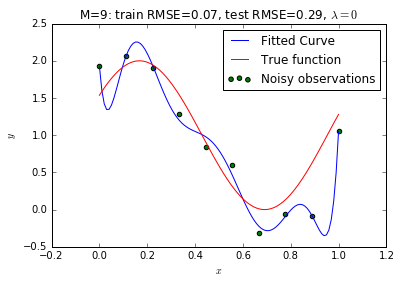

In [10]:
X = np.linspace(0, 1, 100)
l = 0.0
for m in range(10):
    w = pol_cur_fit_reg(training_data, m, l=l)
    w_noreg = pol_cur_fit(training_data, m)
    print('regularized w:', w)
    print('nonreg w:', w_noreg)
    fitted_curve = polynomial(X, w)
    
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    
    plt.plot(X, fitted_curve, 'b', label='Fitted Curve')
    plt.plot(X, y, 'r', label='True function')
    plt.scatter(training_data[0, :], training_data[1, :], c='g', label='Noisy observations')
    plt.title(r'M=%d: train RMSE=%.2f, test RMSE=%.2f, $\lambda=%.1g$' % (m, rms_train, rms_test, l))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.savefig('images/fit_m%d_n_%d_reg.png' % (m, training_data.shape[1]))
    plt.show()

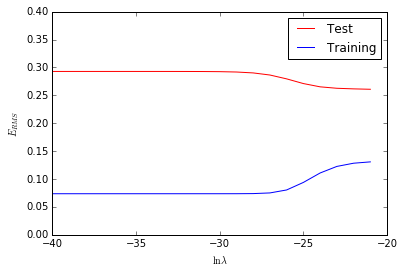

In [11]:
ls = np.arange(-40, -20)
exp_l = np.exp(ls)
errors_train = []
errors_test = []
for l in exp_l:
    w = pol_cur_fit_reg(training_data, 9, l=l)
    rms_train = RMSE(polynomial(training_data[0, :], w), training_data[1, :])
    rms_test = RMSE(polynomial(test_data[0, :], w), test_data[1, :])
    errors_train.append(rms_train)
    errors_test.append(rms_test)

plt.plot(ls, errors_test, 'r', label='Test')
plt.plot(ls, errors_train, 'b', label='Training')
plt.ylim([0, 0.4])
plt.legend()
plt.xlabel(r'$\ln {\lambda}$')
plt.ylabel(r'$E_{RMS}}$')
plt.show()

In [12]:
def h(x, y):
    return 100 * (y - x**2)**2 + (1 - x)**2

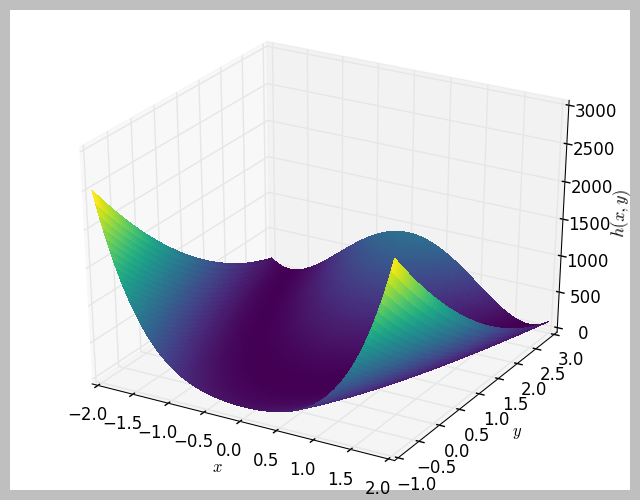

In [105]:
X = np.linspace(-2, 2, 100)
Y = np.linspace(-1, 3, 100)
[x, y] = np.meshgrid(X, Y)
z = h(x, y)

plt.style.use('classic')
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.viridis, linewidth=0, antialiased=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$h(x, y)$')
plt.show()

In [83]:
def gradient_descent(eta = 0.005, start_x = 0, start_y = 0, max_iter = 500):
    x_list, y_list, h_list  = [start_x], [start_y], [h(start_x, start_y)]
    x = start_x
    y = start_y
    for i in range(max_iter):
        #print(i)
        x_temp = x - eta * (400 * x * (x**2-y) - 2 + 2 * x)
        y = y - eta * (200 * (y - x**2))
        x = x_temp
        h_new = h(x,y)
        if h_new >= h_list[-1]:
            break
        #print(x,y,h(x,y))
        x_list.append(x)
        y_list.append(y)
        h_list.append(h(x,y))
        
    
    return x_list, y_list, h_list

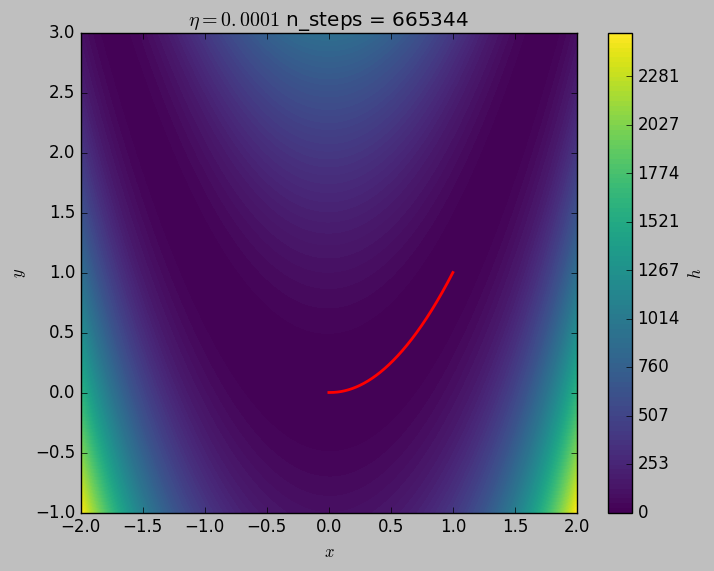

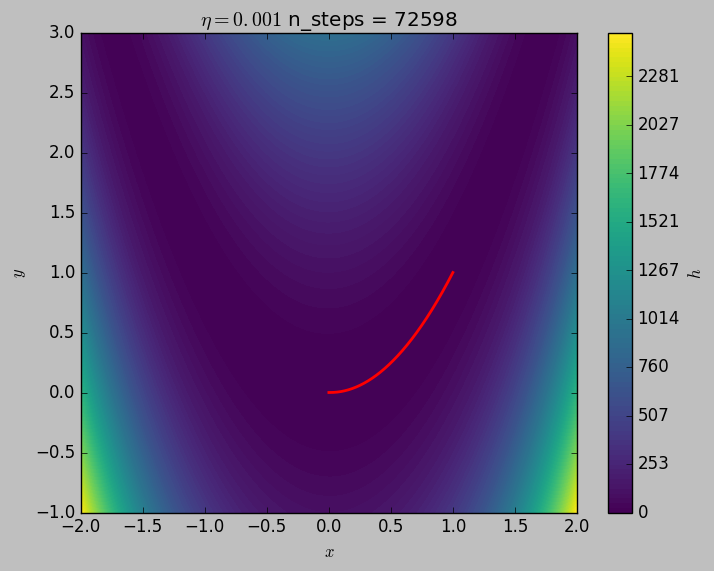

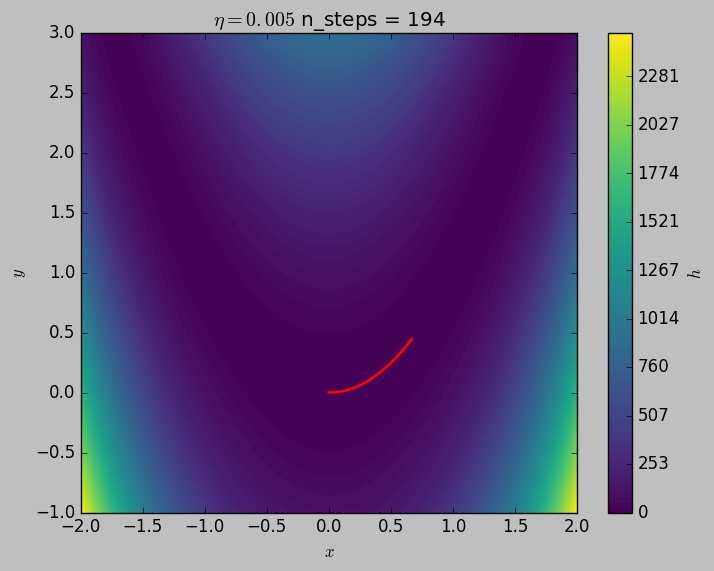

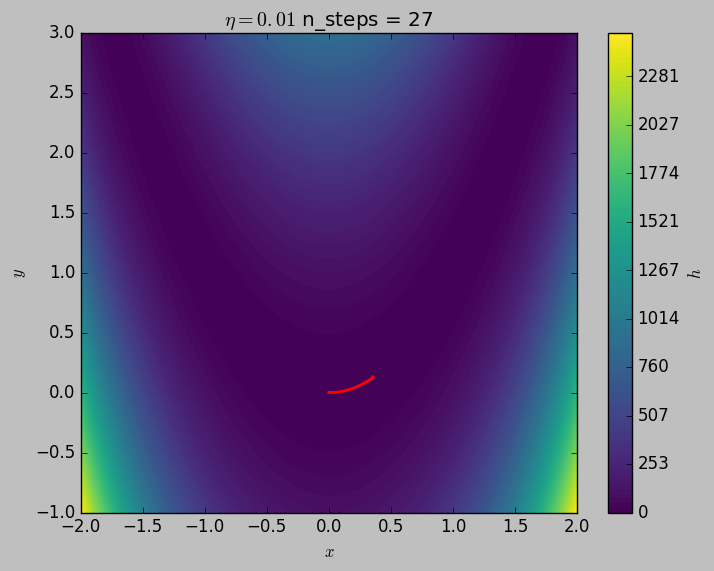

In [113]:
etas = [0.0001, 0.001, 0.005, 0.01]
levels = np.linspace(z.min(), z.max(), 100)


for eta in etas:
    x_list,y_list,h_list = gradient_descent(start_x = 0, start_y = 0, eta = eta, max_iter = 1000000)
    plt.plot(x_list, y_list, c = 'r', label = str(eta), linewidth = 2.0)
    plt.contourf(x,y,z, cmap=plt.cm.viridis, levels = levels)
    plt.title('$\eta = {}$ n_steps = {}'.format(eta, len(h_list)))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.colorbar(label = '$h$')  
    plt.savefig('eta_{}.png'.format(str(eta).replace('.', '_')))
    plt.show()
    
